# Question 1

Accuracy is 0.8461538461538461
ASCII values:- [65 66 67 68 69 70 71 74 73 74 75 76 77 78 79 80 65 82 83 84 69 86 71 88 89
 90]


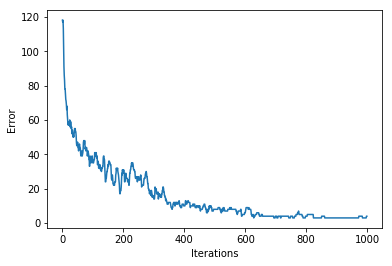

In [2]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# training vectors
data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = float)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

#https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))

# model specifications
Ni = 156; Nh = 20 ;No = 8

Ntrials = 1000

wh=randn(Nh,Ni)
wo=randn(No,Nh) 

dwh=zeros(wh.shape)
dwo=zeros(wo.shape) 
error=zeros(Ntrials)

for trial in range(Ntrials):     
    #randomly pick training example
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) 
    #y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term for each layer   
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights with momentum
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    error[trial]=error[trial]+sum(abs(y - Y))
    
decimal = ((''.join([str(item) for item in data])) for data in y)
predict = [int(row, 2) for row in decimal]
predict = np.array(predict, dtype = int)
a = 0
for i in range(26) :
    if(actualValues[i] == predict[i]):
        a = a+1
print('Accuracy is ' +str(a/26.0) )
print('ASCII values:- '+ str(predict))
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

### Interpretation:
From the above graph we can interpret that the error reduces as the number of iterations increases, the error decreases exponentially. But we can also see that the error never reaches 0.

# Question 2

Accuracy after adding 1% noise is 83.2692307692 %


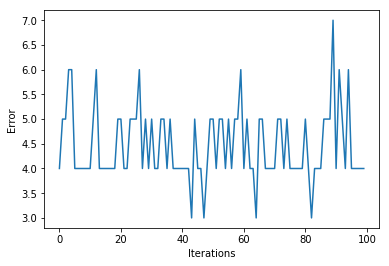

In [3]:
from pylab import *
import matplotlib.pyplot as plt

data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')

acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(2):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after adding 1% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy after adding 5% noise is 63.5769230769 %


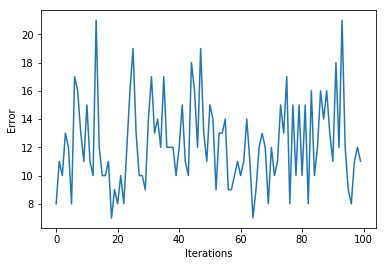

In [4]:
from pylab import *
import matplotlib.pyplot as plt

data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')

acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(8):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after adding 5% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy after adding 10% noise is 45.1153846154 %


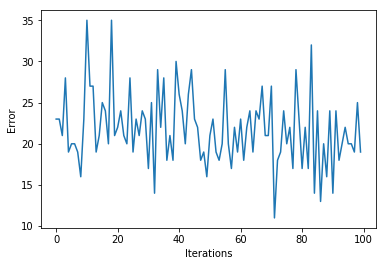

In [5]:
from pylab import *
import matplotlib.pyplot as plt

data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')

acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(15):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after adding 10% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy after adding 20% noise is 23.0 %


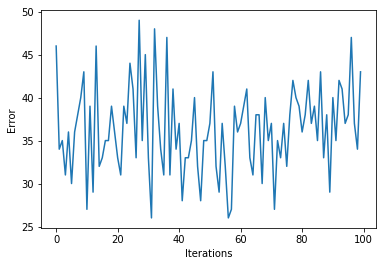

In [6]:
from pylab import *
import matplotlib.pyplot as plt

data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')

acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(31):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after adding 20% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy after adding 50% noise is 8.65384615385 %


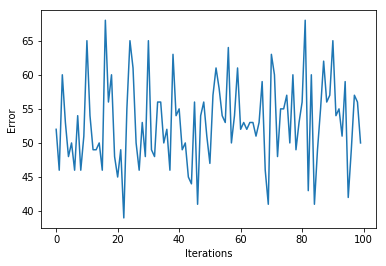

In [7]:
from pylab import *
import matplotlib.pyplot as plt

data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')

acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(77):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after adding 50% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy after adding 75% noise is 6.38461538462 %


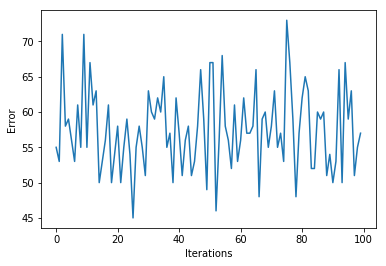

In [8]:
from pylab import *
import matplotlib.pyplot as plt

data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')

acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(116):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after adding 75% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy after adding 100% noise is 5.38461538462 %


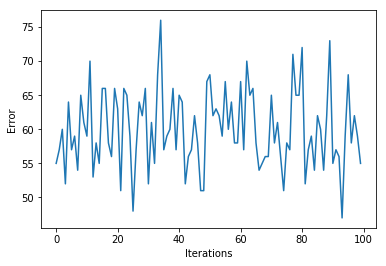

In [9]:
from pylab import *
import matplotlib.pyplot as plt

data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')

acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(156):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after adding 100% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

### Results:
We can infer that by adding more percentage of noise, the accuracy of the decreases. But even after inverting all the bits, there are some letters that can still be predicted by the model correctly, resulting into 4.8% of accuracy.

# Question 3

In [10]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# training vectors
data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = float)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

#https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))

# model specifications
Ni = 156; Nh = 20 ;No = 8

Ntrials = 1000

wh=randn(Nh,Ni)
wo=randn(No,Nh) 

error=zeros(Ntrials)

for trial in range(Ntrials):     
    #randomly pick training example
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) 
    #y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term for each layer   
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights with momentum
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
       
X = np.genfromtxt('Z:\Machine learning\Assign\pattern2.txt', dtype = float, delimiter='  ')

x= X[0 : 12, :].flatten().T

h=1/(1+exp(-wh@x))
y=1/(1+exp(-wo@h)).T   
y = 1*(y>0.5)
print(y)
print('The predicted pattern is: ' +str(int(''.join(str(item) for item in y), 2)))

[0 1 0 0 1 0 0 1]
The predicted pattern is: 73


# Question 4

#### Trainig the model on different % of noise

Accuracy after training model with 1% noise is 90.8076923077 %


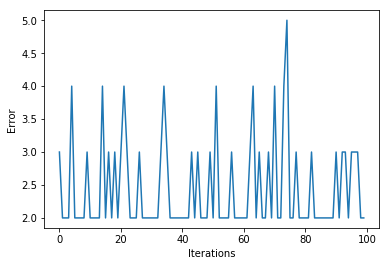

In [11]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# training vectors
data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = float)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

#https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))

# model specifications
Ni = 156; Nh = 20 ;No = 8

Ntrials = 1000

wh=randn(Nh,Ni)
wo=randn(No,Nh) 

error=zeros(Ntrials)

for trial in range(Ntrials):     
    #randomly pick training example
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) 
    #y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term for each layer   
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights with momentum
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    error[trial]=error[trial]+sum(abs(y - Y))
    
acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(2):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after training model with 1% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy after training model with 10% noise is 47.6923076923 %


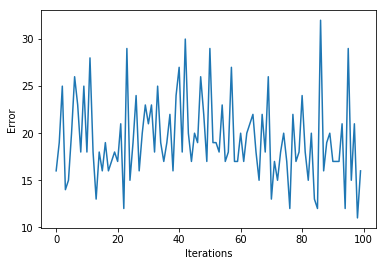

In [12]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# training vectors
data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = float)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

#https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))

# model specifications
Ni = 156; Nh = 20 ;No = 8

Ntrials = 1000

wh=randn(Nh,Ni)
wo=randn(No,Nh) 

error=zeros(Ntrials)

for trial in range(Ntrials):     
    #randomly pick training example
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) 
    #y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term for each layer   
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights with momentum
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    error[trial]=error[trial]+sum(abs(y - Y))
    
acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(15):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after training model with 10% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy after training model with 20% noise is 21.8076923077 %


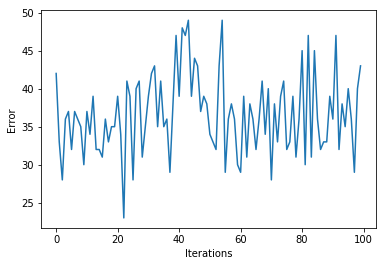

In [13]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# training vectors
data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = float)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

#https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))

# model specifications
Ni = 156; Nh = 20 ;No = 8

Ntrials = 1000

wh=randn(Nh,Ni)
wo=randn(No,Nh) 

error=zeros(Ntrials)

for trial in range(Ntrials):     
    #randomly pick training example
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) 
    #y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term for each layer   
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights with momentum
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    error[trial]=error[trial]+sum(abs(y - Y))
    
acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(31):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after training model with 20% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy after training model with 50% noise is 9.19230769231 %


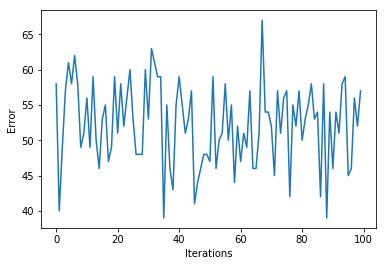

In [14]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# training vectors
data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = float)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

#https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))

# model specifications
Ni = 156; Nh = 20 ;No = 8

Ntrials = 1000

wh=randn(Nh,Ni)
wo=randn(No,Nh) 

error=zeros(Ntrials)

for trial in range(Ntrials):     
    #randomly pick training example
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) 
    #y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term for each layer   
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights with momentum
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    error[trial]=error[trial]+sum(abs(y - Y))
    
acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(77):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after training model with 50% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy after adding 100% noise is 4.57692307692 %


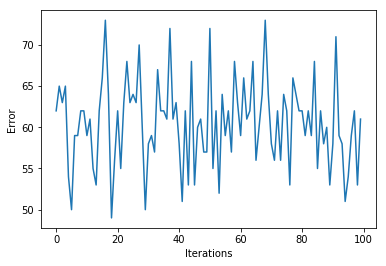

In [15]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# training vectors
data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = float)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

#https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))

# model specifications
Ni = 156; Nh = 20 ;No = 8

Ntrials = 1000

wh=randn(Nh,Ni)
wo=randn(No,Nh) 

error=zeros(Ntrials)

for trial in range(Ntrials):     
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) 
    #y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term   
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights 
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    error[trial]=error[trial]+sum(abs(y - Y))
    
acc = zeros(100)
error=zeros(100)

for iterr in range(100):
    for i in range(26):
        InputData[i] = data[12*i : 12*(i+1), :].flatten()
        # Add some noise here 
        for j in range(156):
            value = randint(0, 156)
            if(InputData[i,value]==1):
                InputData[i,value] = 0
            elif(InputData[i,value]==0):
                InputData[i,value] = 1
                
    #https://stackoverflow.com/questions/10411085/converting-integer-to-binary-in-python
    X = InputData.T
    Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
    actualValues = np.array(range(65,91))
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    BinToDec = ((''.join([str(item) for item in data])) for data in y)
    predictions = [int(row, 2) for row in BinToDec]
    predictions = np.array(predictions, dtype = int)
    error[iterr]=error[iterr]+sum(abs(y - Y))

    a= 0
    for i in range(26) :
        if(actualValues[i] == predictions[i]):
            a= a+1
    acc[iterr] = a/26.0
print('Accuracy after adding 100% noise is ' +str(np.mean(acc)*100) + ' %')
out = (float(i) for i in error)
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

#### Changing the number of hidden nodes

Accuracy is 42.30769230769231 %


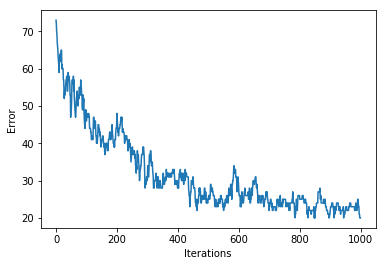

In [16]:
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# training vectors (Boolean AND function and constant input)
data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = int)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))


# model specifications
Ni = 156;Nh = 5 ;No = 8;Ntrials = 1000

h=zeros(Nh)
y=zeros(No) 

wh=randn(Nh,Ni)  
wo=randn(No,Nh) 

dwh=zeros(wh.shape)
dwo=zeros(wo.shape) 

dh=zeros(Nh)
do=zeros(No)  

error=zeros(Ntrials)

for trial in range(Ntrials):     
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) #Output for your first hidden layer
    #y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term   
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
        
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    error[trial]=error[trial]+sum(abs(y - Y))
BinToDec = ((''.join([str(item) for item in data])) for data in y)
predictions = [int(row, 2) for row in BinToDec]
predictions = np.array(predictions, dtype = int)
total = 26.0
a = 0
for i in range(26) :
    if(actualValues[i] == predictions[i]):
        a+= 1
print('Accuracy is ' +str((a/total)*100) + ' %')
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy is 57.692307692307686 %


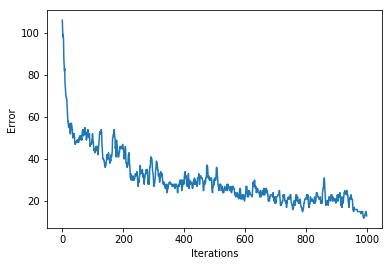

In [17]:
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = int)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))


# model specifications
Ni = 156;Nh = 10;No = 8;Ntrials = 1000

h=zeros(Nh)
y=zeros(No)

wh=randn(Nh,Ni) 
wo=randn(No,Nh) 

dwh=zeros(wh.shape)
dwo=zeros(wo.shape) 

dh=zeros(Nh)
do=zeros(No)  
error=zeros(Ntrials)

for trial in range(Ntrials):     
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) #Output for your first hidden layer
    #y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term  
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
      
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    error[trial]=error[trial]+sum(abs(y - Y))
BinToDec = ((''.join([str(item) for item in data])) for data in y)
predictions = [int(row, 2) for row in BinToDec]
predictions = np.array(predictions, dtype = int)
total = 26.0
a = 0
for i in range(26) :
    if(actualValues[i] == predictions[i]):
        a+= 1
print('Accuracy is ' +str((a/total)*100) + ' %')
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy is 80.76923076923077 %


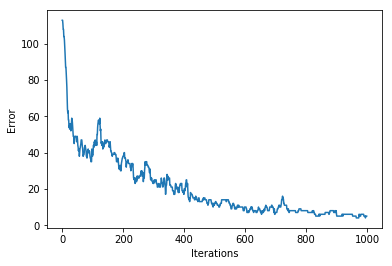

In [18]:
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = int)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))


# model specifications
Ni = 156;Nh = 15;No = 8

Ntrials = 1000

h=zeros(Nh)
y=zeros(No) 

wh=randn(Nh,Ni) 
wo=randn(No,Nh) 

dwh=zeros(wh.shape)
dwo=zeros(wo.shape) 

dh=zeros(Nh)
do=zeros(No)  
error=zeros(Ntrials)

for trial in range(Ntrials):     
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) 
    y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term   
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights with momentum
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    error[trial]=error[trial]+sum(abs(y - Y))
BinToDec = ((''.join([str(item) for item in data])) for data in y)
predictions = [int(row, 2) for row in BinToDec]
predictions = np.array(predictions, dtype = int)
total = 26.0
a = 0
for i in range(26) :
    if(actualValues[i] == predictions[i]):
        a+= 1
print('Accuracy is ' +str((a/total)*100) + ' %')
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy is 100.0 %


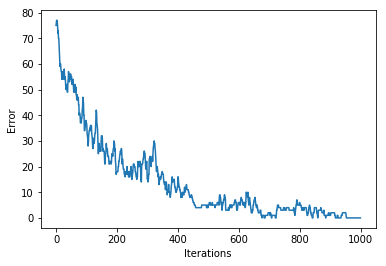

In [19]:
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = int)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))


# model specifications
Ni = 156;Nh = 20;No = 8

Ntrials = 1000

h=zeros(Nh)
y=zeros(No) 

wh=randn(Nh,Ni) 
wo=randn(No,Nh) 

dwh=zeros(wh.shape)
dwo=zeros(wo.shape) 

dh=zeros(Nh)
do=zeros(No)  
error=zeros(Ntrials)

for trial in range(Ntrials):     
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) 
    y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term   
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights with momentum
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    error[trial]=error[trial]+sum(abs(y - Y))
BinToDec = ((''.join([str(item) for item in data])) for data in y)
predictions = [int(row, 2) for row in BinToDec]
predictions = np.array(predictions, dtype = int)
total = 26.0
a = 0
for i in range(26) :
    if(actualValues[i] == predictions[i]):
        a+= 1
print('Accuracy is ' +str((a/total)*100) + ' %')
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

Accuracy is 100.0 %


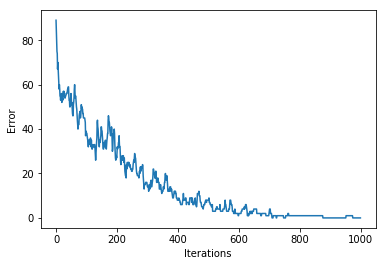

In [20]:
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

data = np.genfromtxt('Z:\Machine learning\Assign\pattern1.txt', dtype = float, delimiter=' ')
InputData = np.ndarray((26,156), dtype = int)

for i in range(26):
    InputData[i] = data[12*i : 12*(i+1), :].flatten()

X = InputData.T
Y = np.array([list('{0:08b}'.format(x)) for x in range(65,91)], dtype = float)
actualValues = np.array(range(65,91))


# model specifications
Ni = 156;Nh = 26;No = 8

Ntrials = 1000

h=zeros(Nh)
y=zeros(No) 

wh=randn(Nh,Ni) 
wo=randn(No,Nh) 

dwh=zeros(wh.shape)
dwo=zeros(wo.shape) 

dh=zeros(Nh)
do=zeros(No)  
error=zeros(Ntrials)

for trial in range(Ntrials):     
    pat = randint(26)
    x=X[:,pat]
    
    #calculate prediction    
    h=1/(1+exp(-np.dot(wh,x))) 
    y= 1*((1/(1+exp(-np.dot(wo,h))))>0.5)
    y= 1/(1+exp(-np.dot(wo,h)))
    
    # delta term   
    do=y*(1-y)*(Y[pat] - y)   
    dh=(h*(1-h))*(wo.transpose()@do)    
    
    # update weights with momentum
    dwo=0.9*dwo+outer(h,do).T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+outer(dh,x)
    wh=wh+0.1*dwh
    
    # test all pattern    
    h=1/(1+exp(-wh@X))
    y=1/(1+exp(-wo@h)).T   
    y = 1*(y>0.5)
    error[trial]=error[trial]+sum(abs(y - Y))
BinToDec = ((''.join([str(item) for item in data])) for data in y)
predictions = [int(row, 2) for row in BinToDec]
predictions = np.array(predictions, dtype = int)
total = 26.0
a = 0
for i in range(26) :
    if(actualValues[i] == predictions[i]):
        a+= 1
print('Accuracy is ' +str((a/total)*100) + ' %')
plt.plot(error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

# Conclusion

As the number of nodes increases, the accuracy of the model increases. But if we use 26 nodes than the accuracy of data becomes 100%( which means that we overfit the data). So we take 20 as our default number of nodes.